# Blueberry Yield Prediction: Data Preparation

In [1]:
# Import data analysis libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Load train data set
train_df = pd.read_csv(r".\data\blueberry-yield-zindua-machine-week-2-challenge\train.csv")

train_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


## Exploratory Data Analysis

### Missingness

In [3]:
# determine which features/columns have missing values

train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass             15289 no

In [4]:
# make sure there are no duplicates using the 'id' column

train_df['id'].is_unique

True

Since there are no missing values, and all rows are unique, we can drop the 'id' column. In this case, '0' values are important to maintain because they indicate the absence of sth e.g. no bees found in that area

In [5]:
# drop id column

train_df.drop('id', axis=1, inplace=True)

In [6]:
train_df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


### Outliers

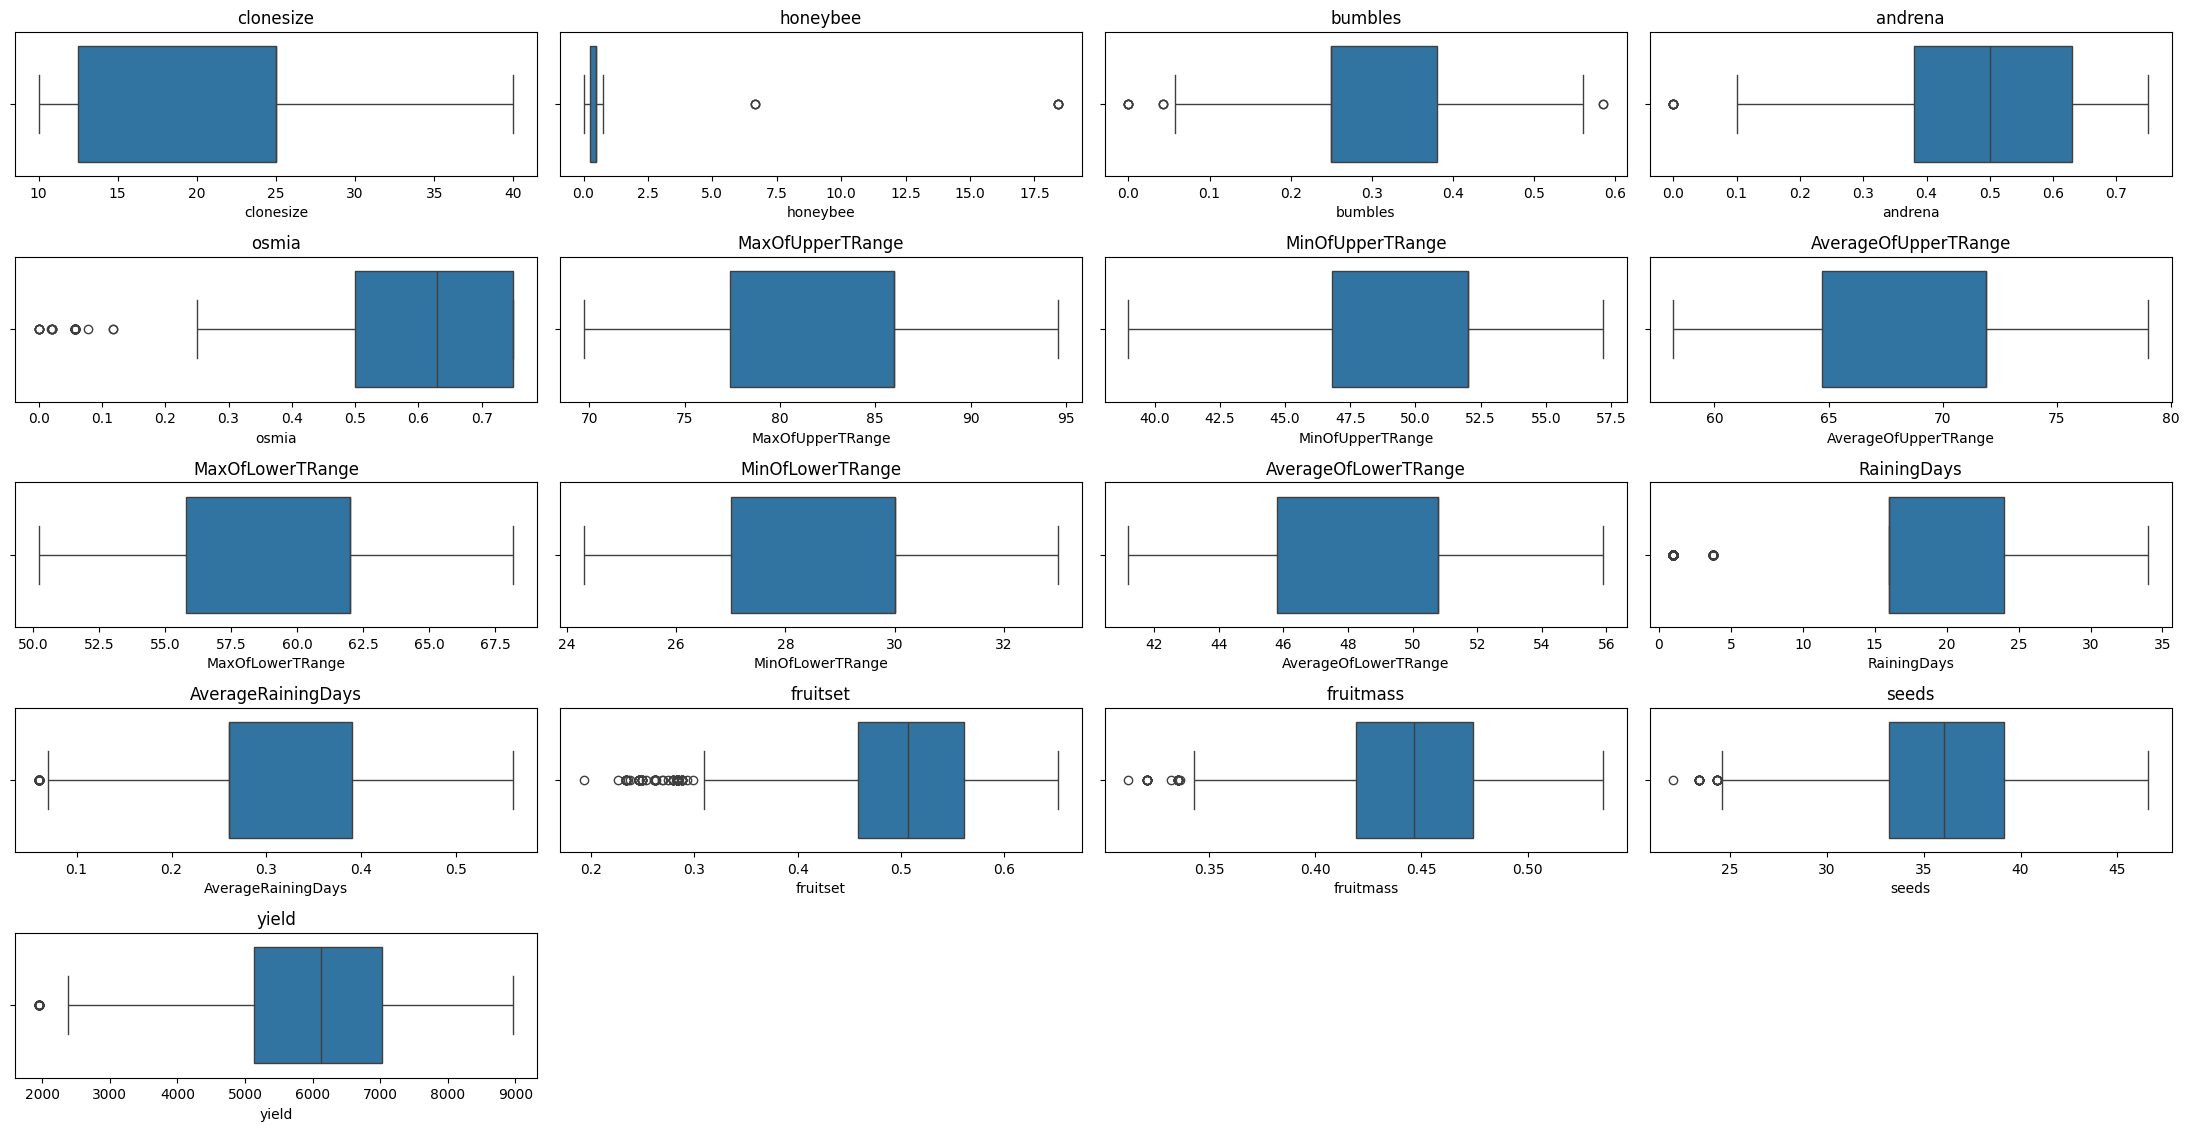

In [7]:
# since it's all numerical data, boxplots can show any clear outliers

fig = plt.figure(figsize=(22,20))
for i in range(len(train_df.columns)):
    ax=fig.add_subplot(9, 4, i+1)
    sns.boxplot(x=train_df.iloc[:, i],ax=ax)
    ax.set_title(train_df.columns[i])
plt.tight_layout()
plt.show()

### Correlation

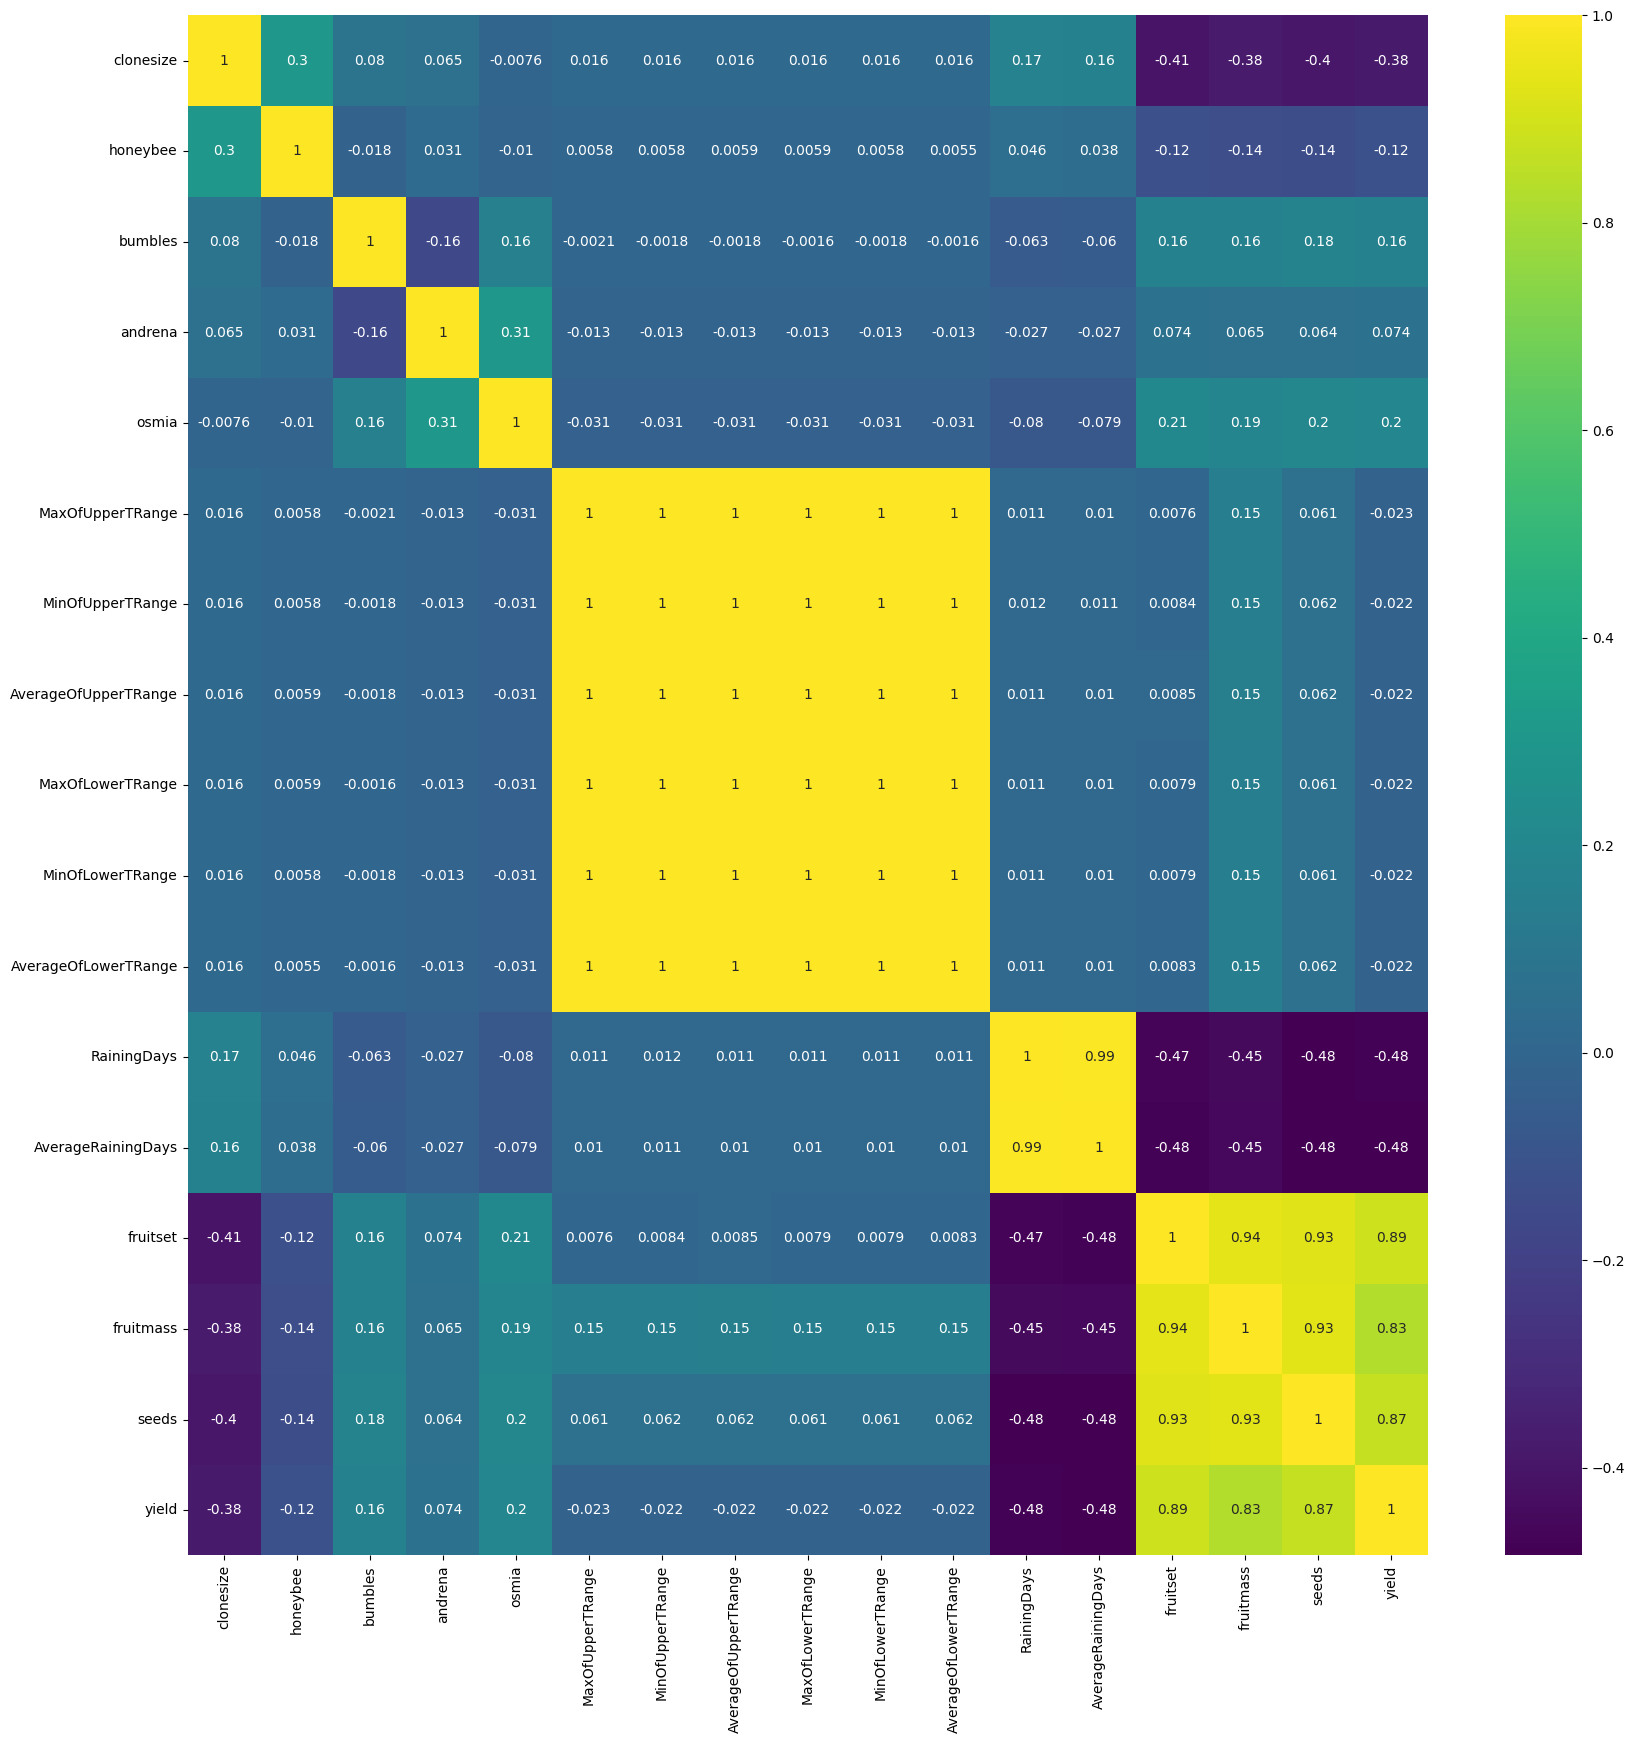

In [8]:
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(train_df[top_corr_features].corr(),
              annot=True,
              cmap="viridis")

### Bivariate analysis

array([[<Axes: title={'center': 'clonesize'}>,
        <Axes: title={'center': 'honeybee'}>,
        <Axes: title={'center': 'bumbles'}>,
        <Axes: title={'center': 'andrena'}>],
       [<Axes: title={'center': 'osmia'}>,
        <Axes: title={'center': 'MaxOfUpperTRange'}>,
        <Axes: title={'center': 'MinOfUpperTRange'}>,
        <Axes: title={'center': 'AverageOfUpperTRange'}>],
       [<Axes: title={'center': 'MaxOfLowerTRange'}>,
        <Axes: title={'center': 'MinOfLowerTRange'}>,
        <Axes: title={'center': 'AverageOfLowerTRange'}>,
        <Axes: title={'center': 'RainingDays'}>],
       [<Axes: title={'center': 'AverageRainingDays'}>,
        <Axes: title={'center': 'fruitset'}>,
        <Axes: title={'center': 'fruitmass'}>,
        <Axes: title={'center': 'seeds'}>],
       [<Axes: title={'center': 'yield'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

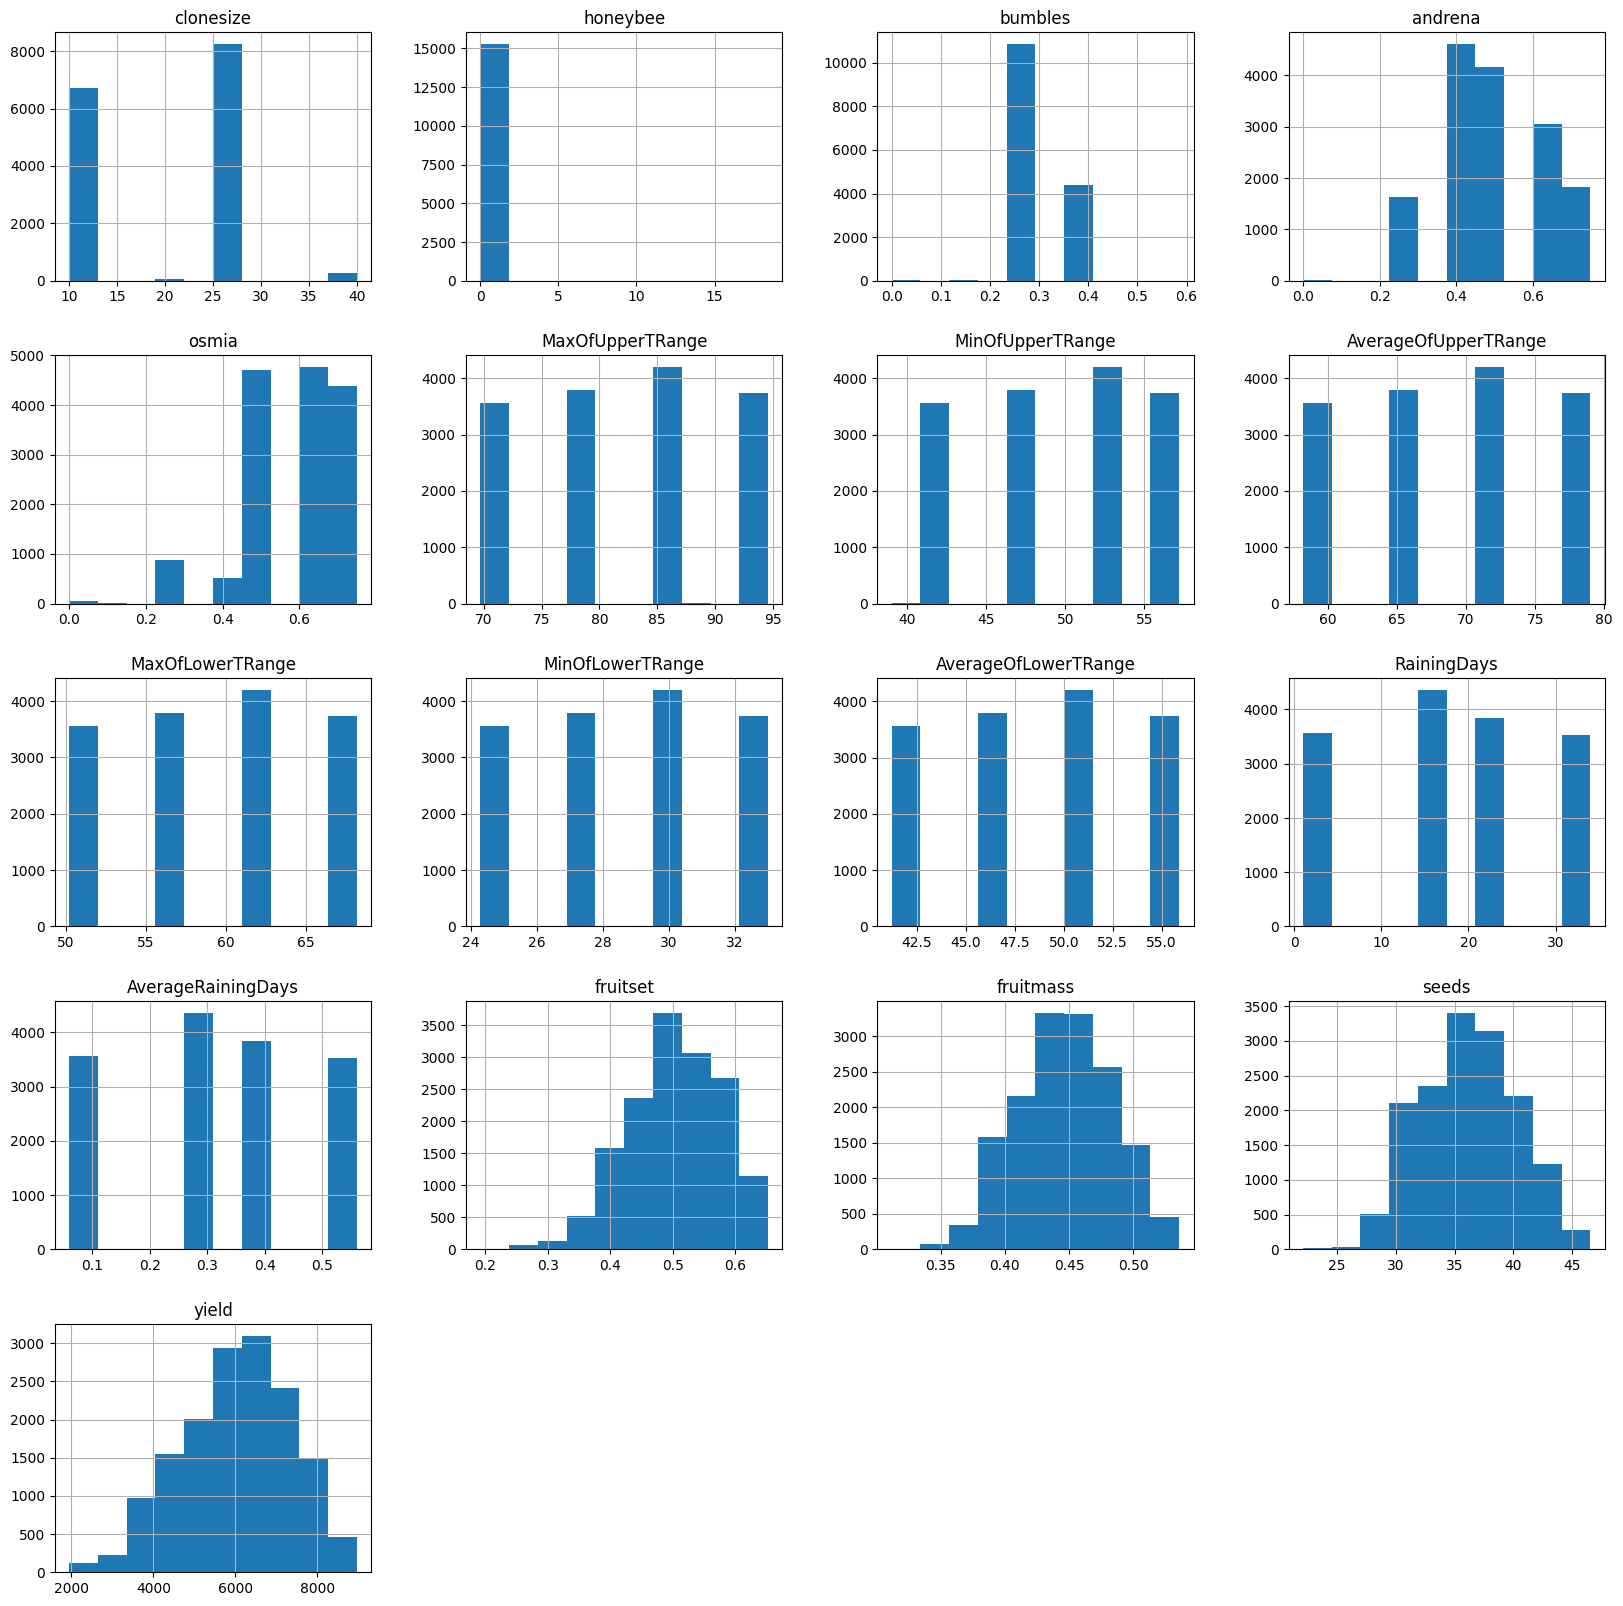

In [9]:
train_df.hist(figsize=(20,20))

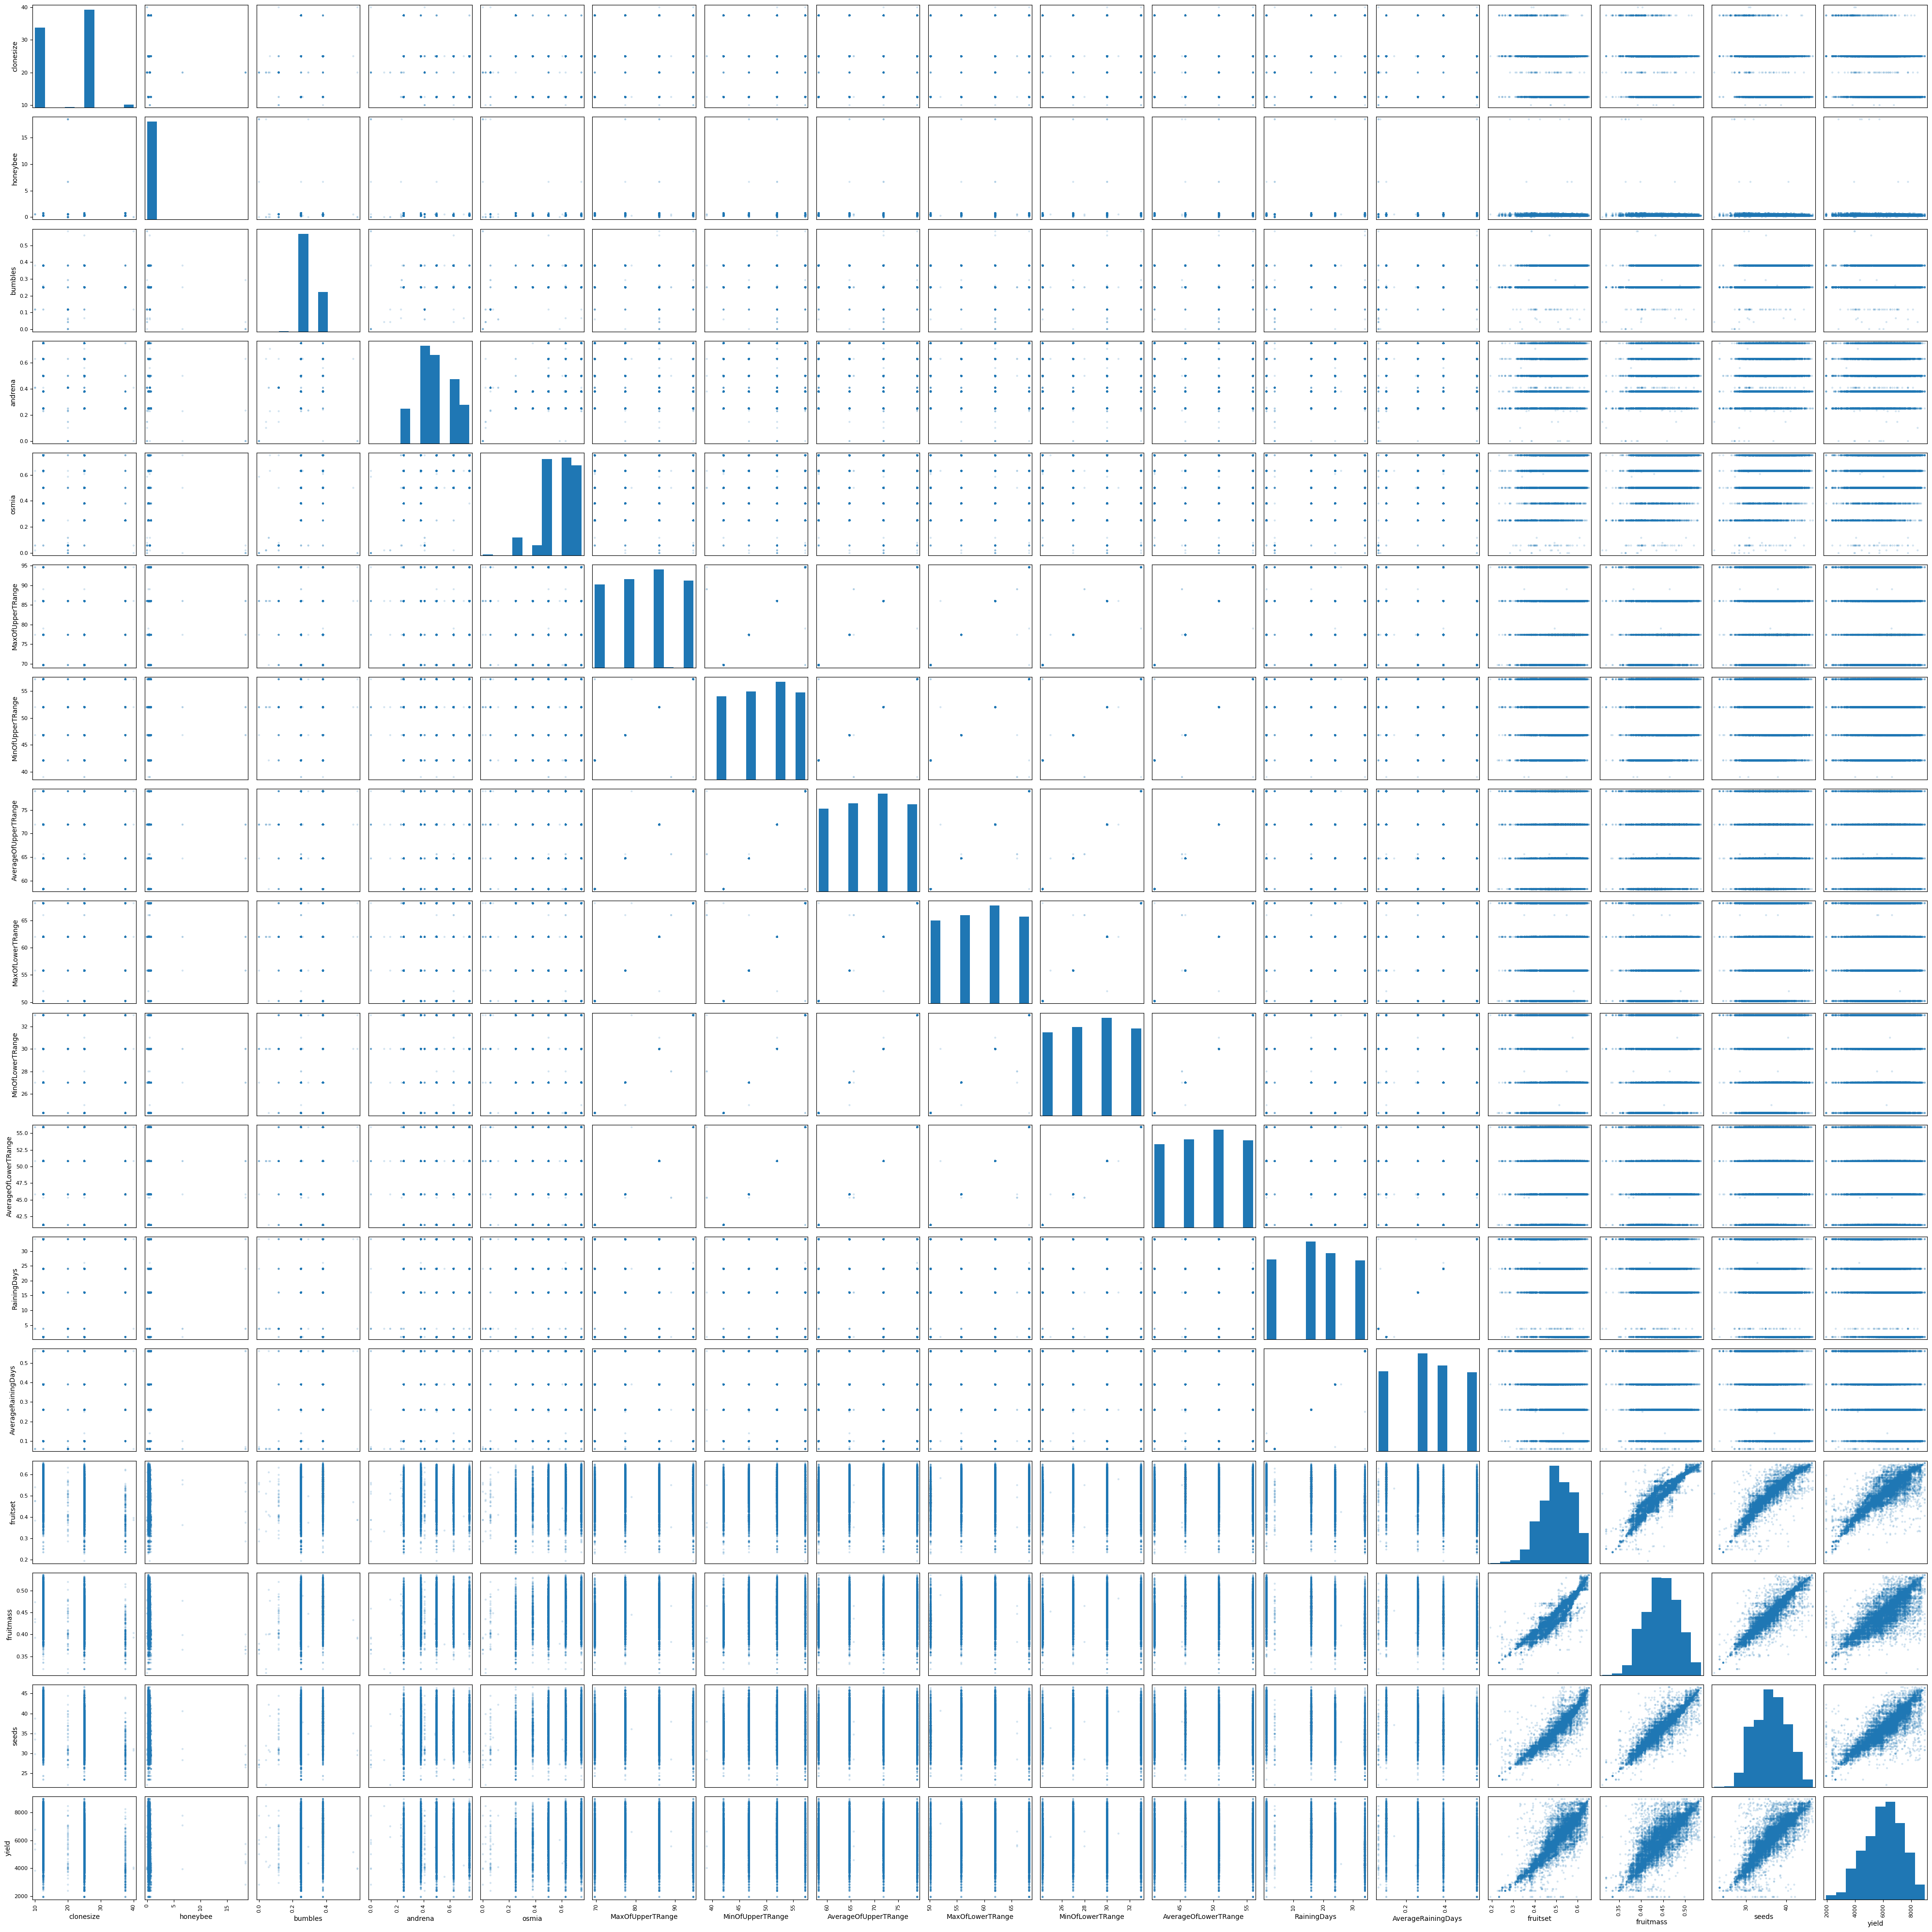

In [10]:
pd.plotting.scatter_matrix(train_df,
                           figsize = (40,40),
                           alpha = 0.2)
plt.tight_layout()

## Data Preprocessing

### Feature Engineering

### Encoding

### Splitting

In [11]:
# split the data

X = train_df.drop('yield', axis=1)
y = train_df[['yield']]

In [12]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, 
                                                                            y, 
                                                                            test_size = 0.2, 
                                                                            random_state = 20)
print (X_train.shape,
       X_test.shape,
       y_train.shape,
       y_test.shape)

(12231, 16) (3058, 16) (12231, 1) (3058, 1)


### Scaling

In [13]:
# apply robust scaling, since we determined there are plenty outliers

scaler = sklearn.preprocessing.RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Apply the linear regression model

In [14]:
reg = sklearn.linear_model.LinearRegression()

In [15]:
mse_score = sklearn.metrics.make_scorer(sklearn.metrics.mean_absolute_error)
scores = sklearn.model_selection.cross_val_score(reg, 
                                                 X_train, 
                                                 y_train,
                                                 cv = 5,
                                                 scoring=mse_score)
print(scores,
      scores.mean())

[369.19038975 386.80934925 376.8132739  366.67006035 364.88782337] 372.874179323568


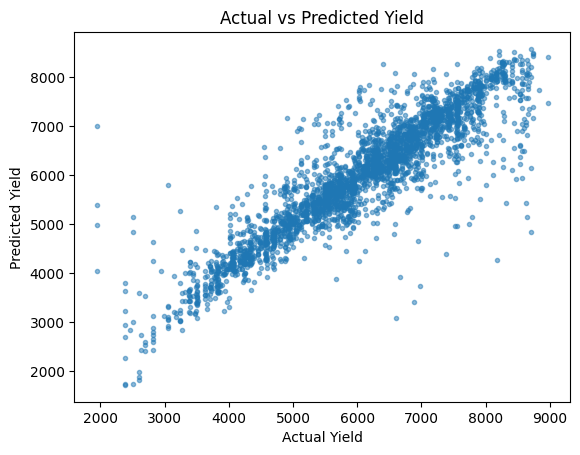

In [16]:
# plot the actual linear regression line

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
plt.scatter(y_test, 
            y_pred,
            alpha = 0.5,
            marker = '.')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.show()


In [17]:
# the mean abs error is...

mse = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mse)

Mean Absolute Error: 367.6186108356154


In [19]:
#plotting the learning curves 

train_sizes, train_scores, val_scores = sklearn.model_selection.learning_curve(
    estimator=reg,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="neg_mean_absolute_error",
    shuffle=True,
    random_state=42
)

In [20]:
#since we used cross validation, calculate the means

train_scores_mean = -train_scores.mean(axis = 1)*100
validation_scores_mean = -val_scores.mean(axis = 1)*100

train_scores_mean

array([35873.57310921, 36842.28014106, 36989.05004888, 36857.7724157 ,
       36863.52218739, 37002.09064943, 37103.71195431, 37204.66053628,
       37148.70079278, 37171.30795247])

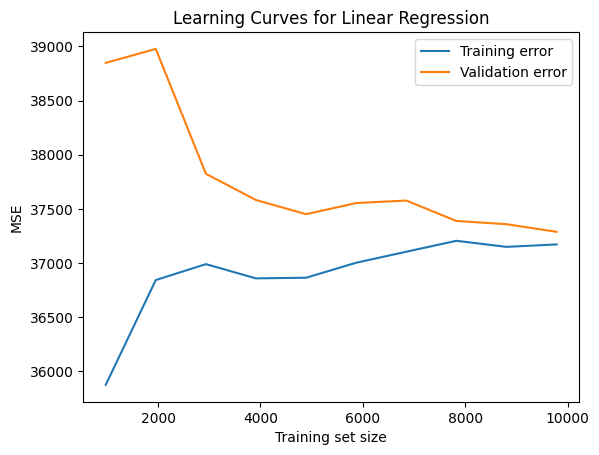

In [21]:
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.title('Learning Curves for Linear Regression')
plt.legend()
plt.show()

In [22]:
y_pred = reg.predict(X_test)

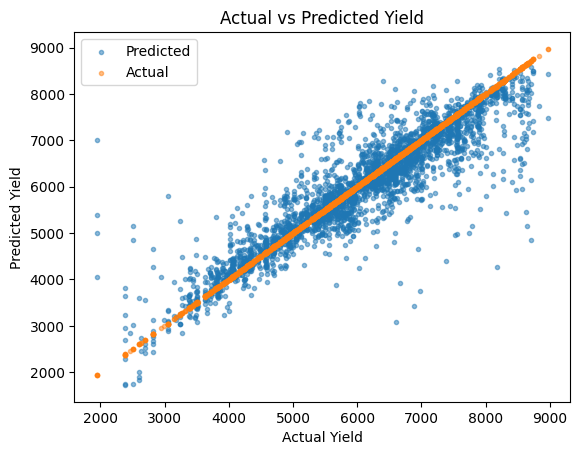

In [23]:
plt.scatter(y_test,
            y_pred,
            alpha = 0.5,
            marker = '.',
            label = 'Predicted')

plt.scatter(y_test,
            y_test,
            alpha = 0.5,
            marker = '.',
            label = 'Actual')

plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.legend()

plt.show()

In [24]:
mse = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mse)

Mean Absolute Error: 367.6186108356154
